In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Motor_Vehicle_Collisions_Crashes.csv" 
df = pd.read_csv(file_path)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/09/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,26/03/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,29/06/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,11/09/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,14/12/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     179921 non-null  object 
 1   CRASH TIME                     179921 non-null  object 
 2   BOROUGH                        118160 non-null  object 
 3   ZIP CODE                       118137 non-null  float64
 4   LATITUDE                       164788 non-null  float64
 5   LONGITUDE                      164788 non-null  float64
 6   LOCATION                       164788 non-null  object 
 7   ON STREET NAME                 130909 non-null  object 
 8   CROSS STREET NAME              83247 non-null   object 
 9   OFF STREET NAME                49010 non-null   object 
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64
 11  NUMBER OF PERSONS KILLED       179921 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

In [4]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], dayfirst=True)
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

df['ZIP CODE'] = df['ZIP CODE'].astype(str)

### Extract day of the week, month, and year from 'CRASH DATE'

In [5]:
df['DAY OF WEEK'] = df['CRASH DATE'].dt.dayofweek
df['MONTH'] = df['CRASH DATE'].dt.month
df['YEAR'] = df['CRASH DATE'].dt.year

### Extract hour from 'CRASH TIME'

In [31]:
df['HOUR'] = df['CRASH TIME'].dt.hour

###  Creating a new column indicating whether a crash occurred during the day or night

In [ ]:
df['DAY/NIGHT'] = df['CRASH TIME'].apply(lambda x: 'Day' if x.hour >= 6 and x.hour < 18 else 'Night')

In [6]:
 df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

In [7]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DAY OF WEEK,MONTH,YEAR,HOUR,DAY/NIGHT
0,2021-09-11,2025-01-16 02:39:00,NaN,nan,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Sedan,Sedan,NaN,NaN,NaN,5,9,2021,2,Night
1,2022-03-26,2025-01-16 11:45:00,NaN,nan,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Sedan,NaN,NaN,NaN,NaN,5,3,2022,11,Day
2,2022-06-29,2025-01-16 06:55:00,NaN,nan,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Sedan,Pick-up Truck,NaN,NaN,NaN,2,6,2022,6,Day
3,2021-09-11,2025-01-16 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Sedan,NaN,NaN,NaN,NaN,5,9,2021,9,Day
4,2021-12-14,2025-01-16 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,1,12,2021,8,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,2023-05-23,2025-01-16 15:17:00,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,1,5,2023,15,Day
179917,2023-05-22,2025-01-16 21:30:00,NaN,nan,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Sedan,Sedan,NaN,NaN,NaN,0,5,2023,21,Night
179918,2023-05-23,2025-01-16 18:04:00,NaN,nan,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,1,5,2023,18,Night
179919,2023-11-19,2025-01-16 01:21:00,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,Pick-up Truck,Sedan,NaN,NaN,NaN,6,11,2023,1,Night


In [8]:
df.drop(columns=['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
                 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                 'CONTRIBUTING FACTOR VEHICLE 5'], inplace=True)

In [9]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DAY OF WEEK,MONTH,YEAR,HOUR,DAY/NIGHT
0,2021-09-11,2025-01-16 02:39:00,NaN,nan,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,5,9,2021,2,Night
1,2022-03-26,2025-01-16 11:45:00,NaN,nan,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Pavement Slippery,NaN,4513547,Sedan,NaN,5,3,2022,11,Day
2,2022-06-29,2025-01-16 06:55:00,NaN,nan,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2,6,2022,6,Day
3,2021-09-11,2025-01-16 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Unspecified,NaN,4456314,Sedan,NaN,5,9,2021,9,Day
4,2021-12-14,2025-01-16 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,1,12,2021,8,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,2023-05-23,2025-01-16 15:17:00,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Failure to Yield Right-of-Way,Unspecified,4631865,Station Wagon/Sport Utility Vehicle,Sedan,1,5,2023,15,Day
179917,2023-05-22,2025-01-16 21:30:00,NaN,nan,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Driver Inattention/Distraction,Driver Inattention/Distraction,4632025,Sedan,Sedan,0,5,2023,21,Night
179918,2023-05-23,2025-01-16 18:04:00,NaN,nan,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Following Too Closely,Unspecified,4631515,Sedan,Tractor Truck Diesel,1,5,2023,18,Night
179919,2023-11-19,2025-01-16 01:21:00,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,Unspecified,NaN,4680998,Pick-up Truck,Sedan,6,11,2023,1,Night


In [10]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DAY OF WEEK,MONTH,YEAR,HOUR,DAY/NIGHT
0,2021-09-11,2025-01-16 02:39:00,NaN,nan,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,5,9,2021,2,Night
1,2022-03-26,2025-01-16 11:45:00,NaN,nan,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Pavement Slippery,NaN,4513547,Sedan,NaN,5,3,2022,11,Day
2,2022-06-29,2025-01-16 06:55:00,NaN,nan,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2,6,2022,6,Day
3,2021-09-11,2025-01-16 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Unspecified,NaN,4456314,Sedan,NaN,5,9,2021,9,Day
4,2021-12-14,2025-01-16 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,1,12,2021,8,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179916,2023-05-23,2025-01-16 15:17:00,BROOKLYN,11215.0,40.669197,-73.992930,"(40.669197, -73.99293)",NaN,NaN,534 3 AVENUE,...,Failure to Yield Right-of-Way,Unspecified,4631865,Station Wagon/Sport Utility Vehicle,Sedan,1,5,2023,15,Day
179917,2023-05-22,2025-01-16 21:30:00,NaN,nan,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY,...,Driver Inattention/Distraction,Driver Inattention/Distraction,4632025,Sedan,Sedan,0,5,2023,21,Night
179918,2023-05-23,2025-01-16 18:04:00,NaN,nan,40.643517,-74.018740,"(40.643517, -74.01874)",GOWANUS EXPY (BQE),NaN,NaN,...,Following Too Closely,Unspecified,4631515,Sedan,Tractor Truck Diesel,1,5,2023,18,Night
179919,2023-11-19,2025-01-16 01:21:00,BROOKLYN,11216.0,40.670124,-73.955280,"(40.670124, -73.95528)",EASTERN PARKWAY,BEDFORD AVENUE,NaN,...,Unspecified,NaN,4680998,Pick-up Truck,Sedan,6,11,2023,1,Night


In [12]:
# Displaying all columns and their values for the first record
first_record = df.iloc[0]
print(first_record)

CRASH DATE                                2021-09-11 00:00:00
CRASH TIME                                2025-01-16 02:39:00
BOROUGH                                                   NaN
ZIP CODE                                                  nan
LATITUDE                                                  NaN
LONGITUDE                                                 NaN
LOCATION                                                  NaN
ON STREET NAME                          WHITESTONE EXPRESSWAY
CROSS STREET NAME                                   20 AVENUE
OFF STREET NAME                                           NaN
NUMBER OF PERSONS INJURED                                 2.0
NUMBER OF PERSONS KILLED                                    0
NUMBER OF PEDESTRIANS INJURED                               0
NUMBER OF PEDESTRIANS KILLED                                0
NUMBER OF CYCLIST INJURED                                   0
NUMBER OF CYCLIST KILLED                                    0
NUMBER O

###  Analyze the frequency of crashes over different time periods.

In [13]:
# Frequency of crashes by day of the week
crashes_by_dayofweek = df['CRASH DATE'].dt.dayofweek.value_counts().sort_index()
print("Frequency of crashes by day of the week:")
print(crashes_by_dayofweek)
print()

# Frequency of crashes by month
crashes_by_month = df['CRASH DATE'].dt.month.value_counts().sort_index()
print("Frequency of crashes by month:")
print(crashes_by_month)
print()

# Frequency of crashes by year
crashes_by_year = df['CRASH DATE'].dt.year.value_counts().sort_index()
print("Frequency of crashes by year:")
print(crashes_by_year)
print()

Frequency of crashes by day of the week:
0    25184
1    25406
2    25645
3    26026
4    28333
5    25768
6    23559
Name: CRASH DATE, dtype: int64

Frequency of crashes by month:
1     15631
2     14351
3     17105
4     17287
5     19783
6     20053
7     18798
8     18170
9     10486
10    10241
11     9429
12     8587
Name: CRASH DATE, dtype: int64

Frequency of crashes by year:
2021    110525
2022     69228
2023       131
2024        37
Name: CRASH DATE, dtype: int64



### Crash Analysis and Visualization

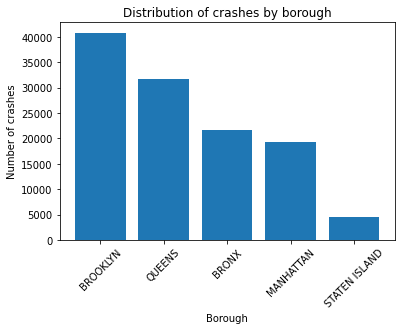

Summary statistics of injuries and fatalities:
       NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
count              179920.000000             179921.000000
mean                    0.478496                  0.002601
std                     0.802098                  0.053386
min                     0.000000                  0.000000
25%                     0.000000                  0.000000
50%                     0.000000                  0.000000
75%                     1.000000                  0.000000
max                    40.000000                  3.000000

Top contributing factors:
Unspecified                       44464
Driver Inattention/Distraction    43651
Failure to Yield Right-of-Way     12280
Following Too Closely             11876
Passing or Lane Usage Improper     8105
Passing Too Closely                6946
Unsafe Speed                       6286
Backing Unsafely                   5704
Traffic Control Disregarded        5068
Other Vehicular                    

In [14]:
# Geospatial Analysis
# Visualizing distribution of crashes by borough
import matplotlib.pyplot as plt

borough_crashes = df['BOROUGH'].value_counts()
plt.bar(borough_crashes.index, borough_crashes.values)
plt.title("Distribution of crashes by borough")
plt.xlabel("Borough")
plt.ylabel("Number of crashes")
plt.xticks(rotation=45)
plt.show()


# Severity Analysis
# Summary statistics of injuries and fatalities
summary_stats = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].describe()
print("Summary statistics of injuries and fatalities:")
print(summary_stats)
print()


# Contributing Factors Analysis
# Frequency of contributing factors
contributing_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
print("Top contributing factors:")
print(contributing_factors)



Top vehicle types involved in crashes:
Sedan                                  85122
Station Wagon/Sport Utility Vehicle    62844
Taxi                                    4550
Pick-up Truck                           3697
Box Truck                               3078
Bus                                     2985
Bike                                    2575
E-Bike                                  1541
Motorcycle                              1481
Tractor Truck Diesel                    1355
Name: VEHICLE TYPE CODE 1, dtype: int64

Frequency of crashes by time of day:
Day      106758
Night     73163
Name: DAY/NIGHT, dtype: int64

Summary statistics of injuries and fatalities by borough:
               NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
BOROUGH                                                           
BRONX                           0.441077                  0.002260
BROOKLYN                        0.473508                  0.001935
MANHATTAN                       0.415285    

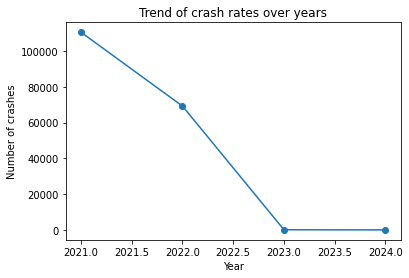

In [15]:
# Vehicle Type Analysis
# Frequency of vehicle types involved in crashes
vehicle_types = df['VEHICLE TYPE CODE 1'].value_counts().head(10)
print("Top vehicle types involved in crashes:")
print(vehicle_types)
print()


# Time of Day Analysis
# Frequency of crashes by time of day (day vs. night)
crashes_by_daynight = df['DAY/NIGHT'].value_counts()
print("Frequency of crashes by time of day:")
print(crashes_by_daynight)
print()

# Comparison Across Boroughs
# Summary statistics of injuries and fatalities by borough
summary_stats_by_borough = df.groupby('BOROUGH')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].mean()
print("Summary statistics of injuries and fatalities by borough:")
print(summary_stats_by_borough)
print()


# Trend Analysis
# Trend of crash rates over years
crash_rates_over_years = df.groupby('YEAR').size()
plt.plot(crash_rates_over_years.index, crash_rates_over_years.values, marker='o')
plt.title("Trend of crash rates over years")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()

###  Plotting the top vehicle types involved in crashes

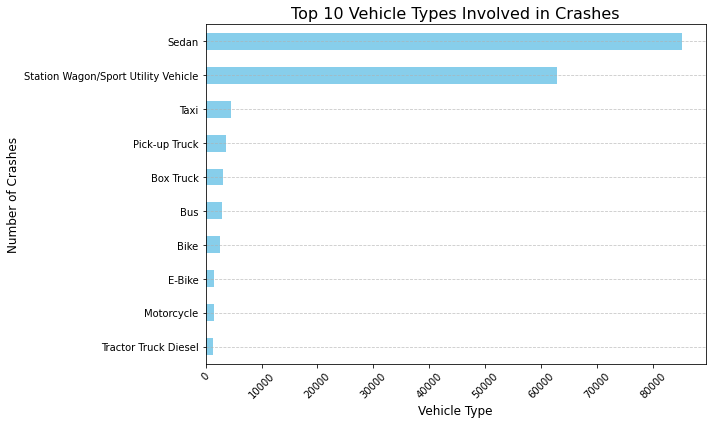

In [16]:
plt.figure(figsize=(10, 6))
vehicle_types.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Vehicle Types Involved in Crashes", fontsize=16)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###  Pie chart for crashes by time of day

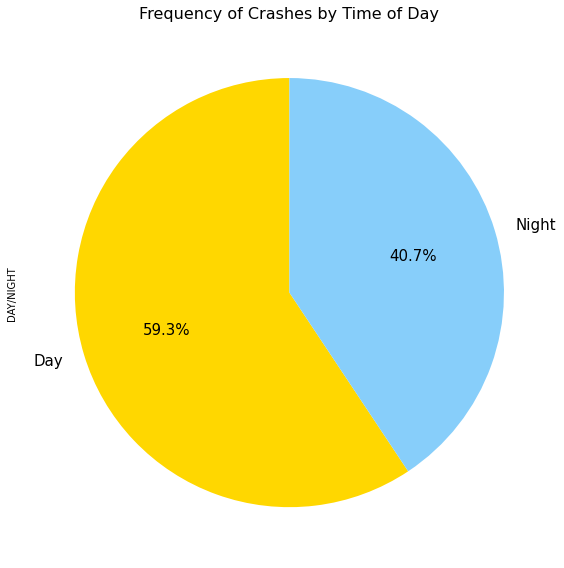

In [17]:
plt.figure(figsize=(8, 8))
crashes_by_daynight.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightskyblue'], startangle=90,fontsize=15)
plt.title("Frequency of Crashes by Time of Day", fontsize=16)
plt.tight_layout()
plt.show()

### Average Injuries and Fatalities by Borough: Bar Plot

<Figure size 864x432 with 0 Axes>

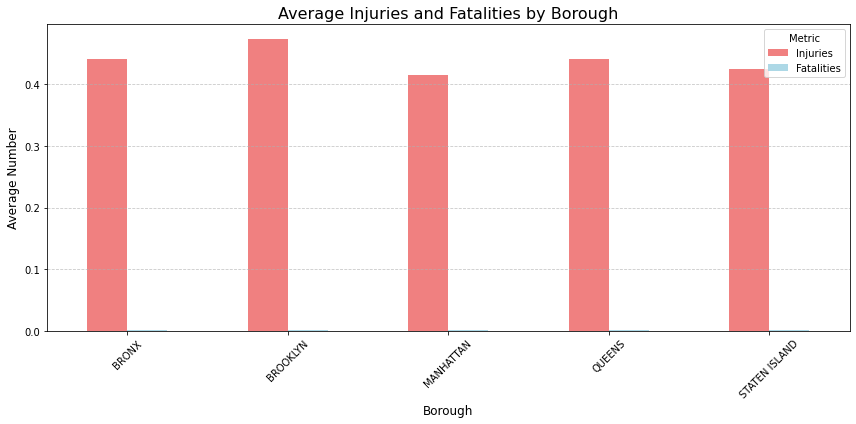

In [18]:
plt.figure(figsize=(12, 6))
summary_stats_by_borough.plot(kind='bar', figsize=(12, 6), color=['lightcoral', 'lightblue'])
plt.title("Average Injuries and Fatalities by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Average Number", fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Injuries', 'Fatalities'], title="Metric", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Crash Frequency Analysis: Day of the Week and Month

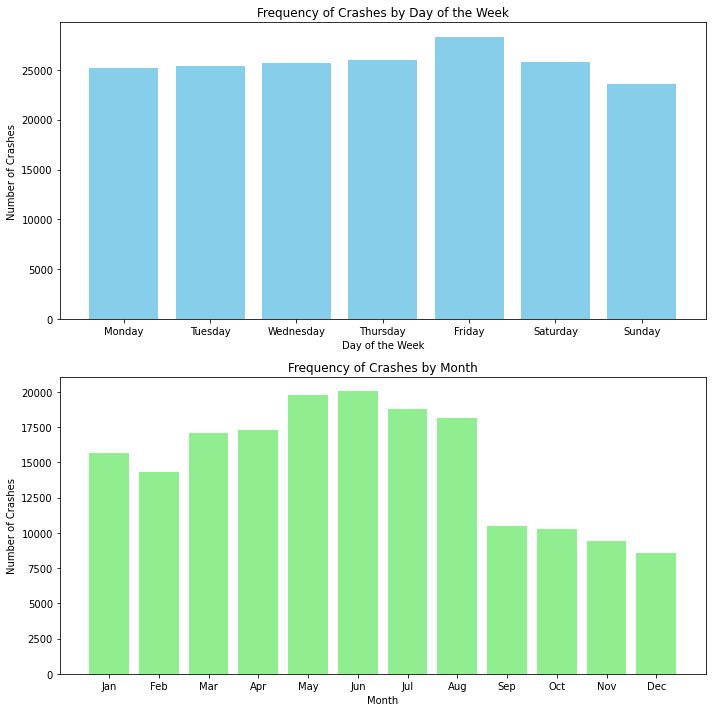

In [19]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot frequency of crashes by day of the week
axes[0].bar(crashes_by_dayofweek.index, crashes_by_dayofweek.values, color='skyblue')
axes[0].set_title('Frequency of Crashes by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Crashes')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot frequency of crashes by month
axes[1].bar(crashes_by_month.index, crashes_by_month.values, color='lightgreen')
axes[1].set_title('Frequency of Crashes by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Crashes')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout
plt.tight_layout()
plt.show()


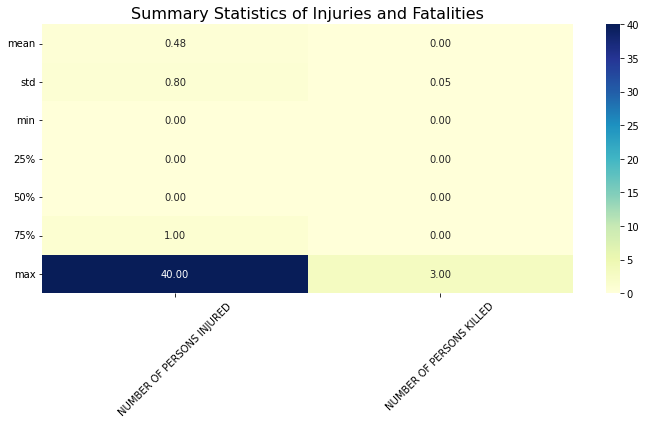

In [20]:
# Heatmap for summary statistics
plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats.iloc[1:], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Summary Statistics of Injuries and Fatalities", fontsize=16)
plt.xticks(rotation=45, ha="center")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Top contributing factors for crashes

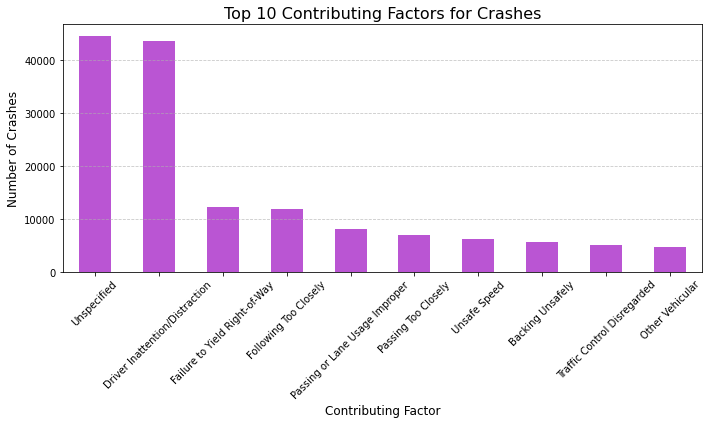

In [21]:
plt.figure(figsize=(10, 6))
contributing_factors.plot(kind='bar', color='mediumorchid')
plt.title("Top 10 Contributing Factors for Crashes", fontsize=16)
plt.xlabel("Contributing Factor", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


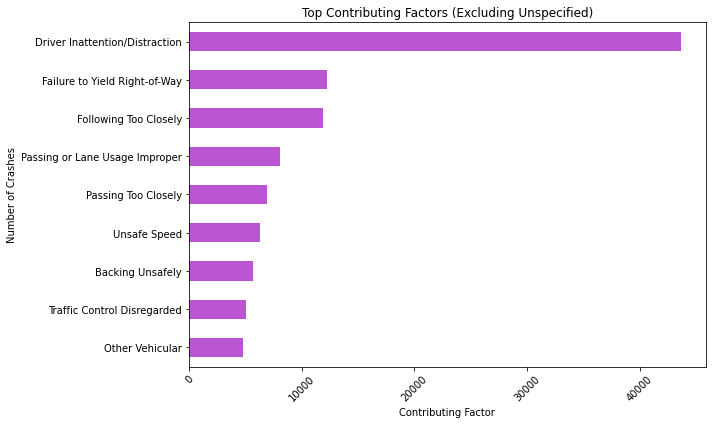

In [22]:
# Plotting top contributing factors (excluding 'Unspecified')
plt.figure(figsize=(10, 6))
contributing_factors.drop('Unspecified', errors='ignore').sort_values().plot(kind='barh', color='mediumorchid')
plt.title('Top Contributing Factors (Excluding Unspecified)')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


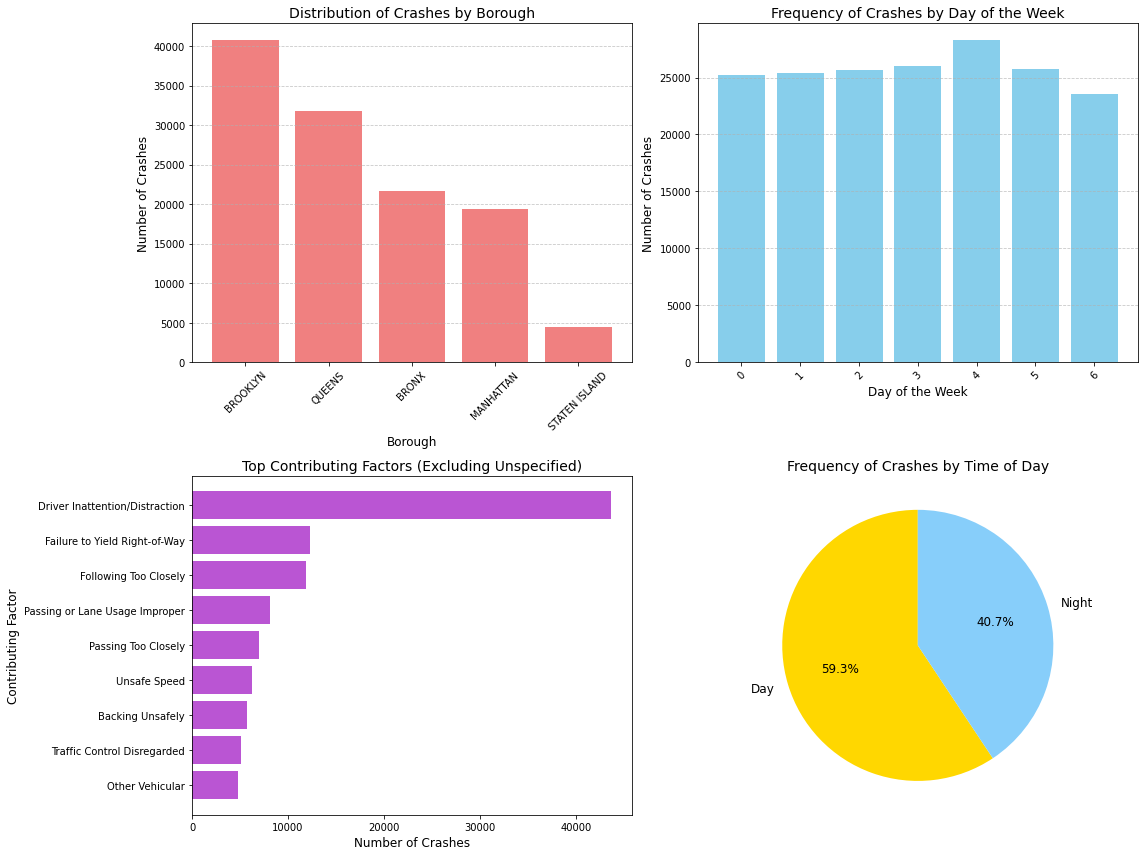

In [23]:
# Set up a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar plot for crashes by borough
axes[0, 0].bar(borough_crashes.index, borough_crashes.values, color='lightcoral')
axes[0, 0].set_title("Distribution of Crashes by Borough", fontsize=14)
axes[0, 0].set_xlabel("Borough", fontsize=12)
axes[0, 0].set_ylabel("Number of Crashes", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot for frequency of crashes by day of the week
axes[0, 1].bar(crashes_by_dayofweek.index, crashes_by_dayofweek.values, color='skyblue')
axes[0, 1].set_title("Frequency of Crashes by Day of the Week", fontsize=14)
axes[0, 1].set_xlabel("Day of the Week", fontsize=12)
axes[0, 1].set_ylabel("Number of Crashes", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Horizontal bar plot for top contributing factors (excluding 'Unspecified')
contributing_factors_filtered = contributing_factors.drop('Unspecified', errors='ignore').sort_values()
axes[1, 0].barh(contributing_factors_filtered.index, contributing_factors_filtered.values, color='mediumorchid')
axes[1, 0].set_title("Top Contributing Factors (Excluding Unspecified)", fontsize=14)
axes[1, 0].set_xlabel("Number of Crashes", fontsize=12)
axes[1, 0].set_ylabel("Contributing Factor", fontsize=12)
axes[1, 0].tick_params(axis='y')

# Pie chart for crashes by time of day
axes[1, 1].pie(
    crashes_by_daynight.values,
    labels=crashes_by_daynight.index,
    autopct='%1.1f%%',
    colors=['gold', 'lightskyblue'],
    startangle=90,
    textprops={'fontsize': 12}
)
axes[1, 1].set_title("Frequency of Crashes by Time of Day", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


### Table of top contributing factors by borough

In [24]:
top_contributing_factors_by_borough = df.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count().unstack().fillna(0)
top_contributing_factors_by_borough


CONTRIBUTING FACTOR VEHICLE 1,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,...,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,19.0,199.0,377.0,7.0,811.0,74.0,16.0,0.0,4384.0,371.0,...,12.0,597.0,603.0,284.0,930.0,7067.0,5.0,4.0,251.0,0.0
BROOKLYN,28.0,283.0,654.0,26.0,1413.0,150.0,18.0,1.0,9655.0,708.0,...,23.0,1096.0,850.0,354.0,1113.0,13468.0,1.0,4.0,339.0,1.0
MANHATTAN,14.0,166.0,285.0,8.0,783.0,72.0,12.0,1.0,5272.0,373.0,...,6.0,584.0,487.0,417.0,356.0,4412.0,4.0,5.0,196.0,0.0
QUEENS,26.0,203.0,636.0,34.0,1279.0,139.0,13.0,0.0,7951.0,630.0,...,16.0,1144.0,752.0,336.0,1069.0,7021.0,2.0,4.0,257.0,0.0
STATEN ISLAND,4.0,27.0,101.0,18.0,181.0,37.0,3.0,0.0,1210.0,101.0,...,2.0,104.0,110.0,48.0,115.0,1179.0,1.0,1.0,38.0,0.0


###  Pedestrian injuries by time of day

In [25]:
pedestrian_injuries_by_time_of_day = df.groupby(['DAY/NIGHT'])['NUMBER OF PEDESTRIANS INJURED'].sum()
pedestrian_injuries_by_time_of_day

DAY/NIGHT
Day      7897
Night    5125
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

### Table of pedestrian injuries by time of day

In [26]:
vehicle_type_severity = df.groupby('VEHICLE TYPE CODE 1')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].mean()
vehicle_type_severity

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
VEHICLE TYPE CODE 1,,
''lime mope,1.000000,0.0
.,0.000000,0.0
12 PASSENG,0.000000,0.0
12 passage,5.000000,0.0
2 dr sedan,0.444444,0.0
...,...,...
usps truck,1.000000,0.0
utility,1.000000,0.0
utility tr,0.000000,0.0


### Average severity by time of day

In [27]:
severity_by_time_of_day = df.groupby(['DAY/NIGHT'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].mean()
severity_by_time_of_day

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY/NIGHT,,
Day,0.447390,0.001752
Night,0.523885,0.003841


In [28]:
# Table of top 5 contributing factors by borough
top_contributing_factors_by_borough = df.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count().unstack().fillna(0)
top_contributing_factors_by_borough = top_contributing_factors_by_borough.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)
top_contributing_factors_by_borough


CONTRIBUTING FACTOR VEHICLE 1,Backing Unsafely,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Other Vehicular,Passing Too Closely,Passing or Lane Usage Improper,Unsafe Speed,Unspecified
BOROUGH,,,,,,,,,
BRONX,NaN,4384.0,1194.0,NaN,874.0,NaN,NaN,930.0,7067.0
BROOKLYN,NaN,9655.0,2693.0,NaN,NaN,1629.0,1531.0,NaN,13468.0
MANHATTAN,NaN,5272.0,1136.0,NaN,NaN,960.0,948.0,NaN,4412.0
QUEENS,NaN,7951.0,3265.0,1639.0,NaN,NaN,1706.0,NaN,7021.0
STATEN ISLAND,181.0,1210.0,339.0,155.0,NaN,NaN,NaN,NaN,1179.0


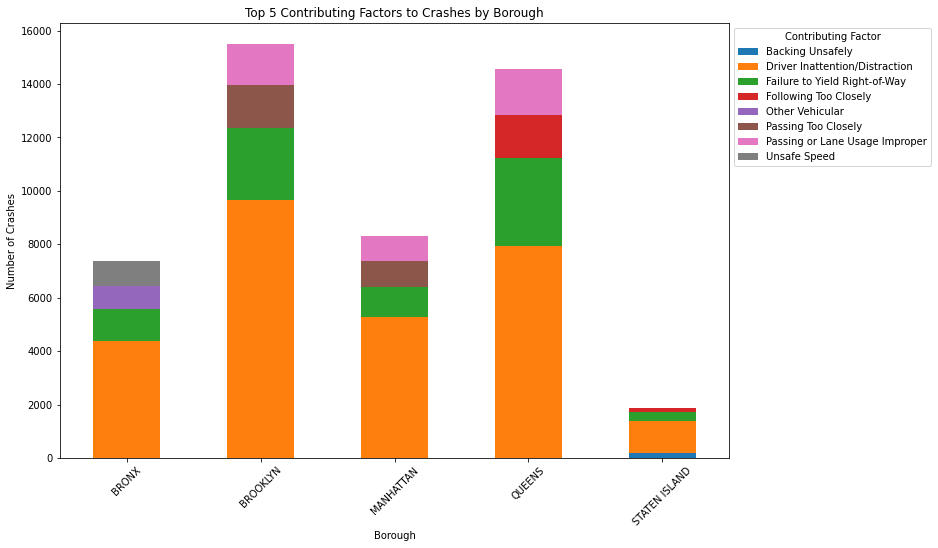

In [29]:
# Remove 'Unspecified' from the dataframe
top_contributing_factors_by_borough = top_contributing_factors_by_borough.drop('Unspecified', axis=1, errors='ignore')

# Plot the stacked bar plot
top_contributing_factors_by_borough.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Contributing Factors to Crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Contributing Factor', bbox_to_anchor=(1, 1))
plt.show()

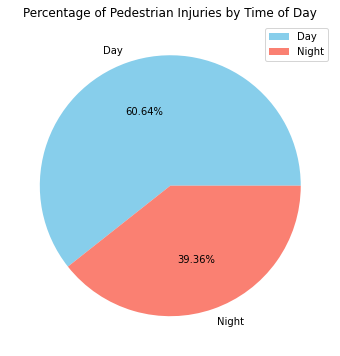

In [30]:
# Plot the data as a pie chart
plt.figure(figsize=(8, 6))
pedestrian_injuries_by_time_of_day.plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'salmon'])
plt.title('Percentage of Pedestrian Injuries by Time of Day')
plt.ylabel('')
plt.legend(['Day', 'Night'], bbox_to_anchor=(1, 1))
plt.show()
